In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [178]:
base_df = pd.read_csv('C:/Users/KornkamolSampaongern/LLMInformationExtraction/data/output/azure-ai-gpt35/squad/evaluation_SQUAD Base Model_Output_Table_09-10-2024-16-10.csv')
tune_df = pd.read_csv('C:/Users/KornkamolSampaongern/LLMInformationExtraction/data/output/azure-ai-gpt35/squad/evaluation_SQUAD Tune Model_Output_Table_09-10-2024-16-10.csv')

In [11]:
base_df

,inputs.question,inputs.answer,inputs.context,inputs.ground_truth,gpt_coherence,gpt_fluency,gpt_groundedness,gpt_relevance,gpt_similarity,f1_score,index,status
0,Which NFL team represented the NFC at Super Bo...,The NFC team that represented the conference a...,Super Bowl 50 was an American football game to...,['Carolina Panthers'],5,1,5,5,5,0.17,0,Completed
1,Where did Super Bowl 50 take place?,Super Bowl 50 took place at Levi's Stadium in ...,Super Bowl 50 was an American football game to...,"['Santa Clara, California', ""Levi's Stadium"", ...",5,3,5,5,5,0.67,1,Completed
2,What color was used to emphasize the 50th anni...,The color that was used to emphasize the 50th ...,Super Bowl 50 was an American football game to...,['gold'],5,4,5,5,5,0.08,2,Completed
3,What was the theme of Super Bowl 50?,"The theme of Super Bowl 50 was the ""golden ann...",Super Bowl 50 was an American football game to...,"['""golden anniversary""', 'gold-themed', '""gold...",5,5,5,5,1,0.13,3,Completed
4,What day was the game played on?,"The game was played on February 7, 2016.",Super Bowl 50 was an American football game to...,"['February 7, 2016', 'February 7']",1,5,5,5,5,0.50,4,Completed
...,...,...,...,...,...,...,...,...,...,...,...,...
995,"What is the basic pay for a teacher, in Euros?",The basic pay for a starting teacher in Irelan...,Salaries for primary teachers in Ireland depen...,"['27,814', '€27,814']",1,1,5,3,1,0.03,996,-
996,"What can a principal make, if he/she works for...","A principal of a big school in Ireland, with m...",Salaries for primary teachers in Ireland depen...,"['90,000', '€90,000']",4,3,5,5,1,0.05,997,-
997,With whom are teachers required to register?,Teachers are required to register with the Tea...,Teachers are required to be registered with th...,"['the Teaching Council', 'Teaching Council']",4,5,5,5,5,0.33,998,-
998,When was vetting introduced?,Vetting in Ireland was introduced in 2006 for ...,From 2006 Garda vetting has been introduced fo...,['2006'],4,3,1,1,1,0.05,999,-


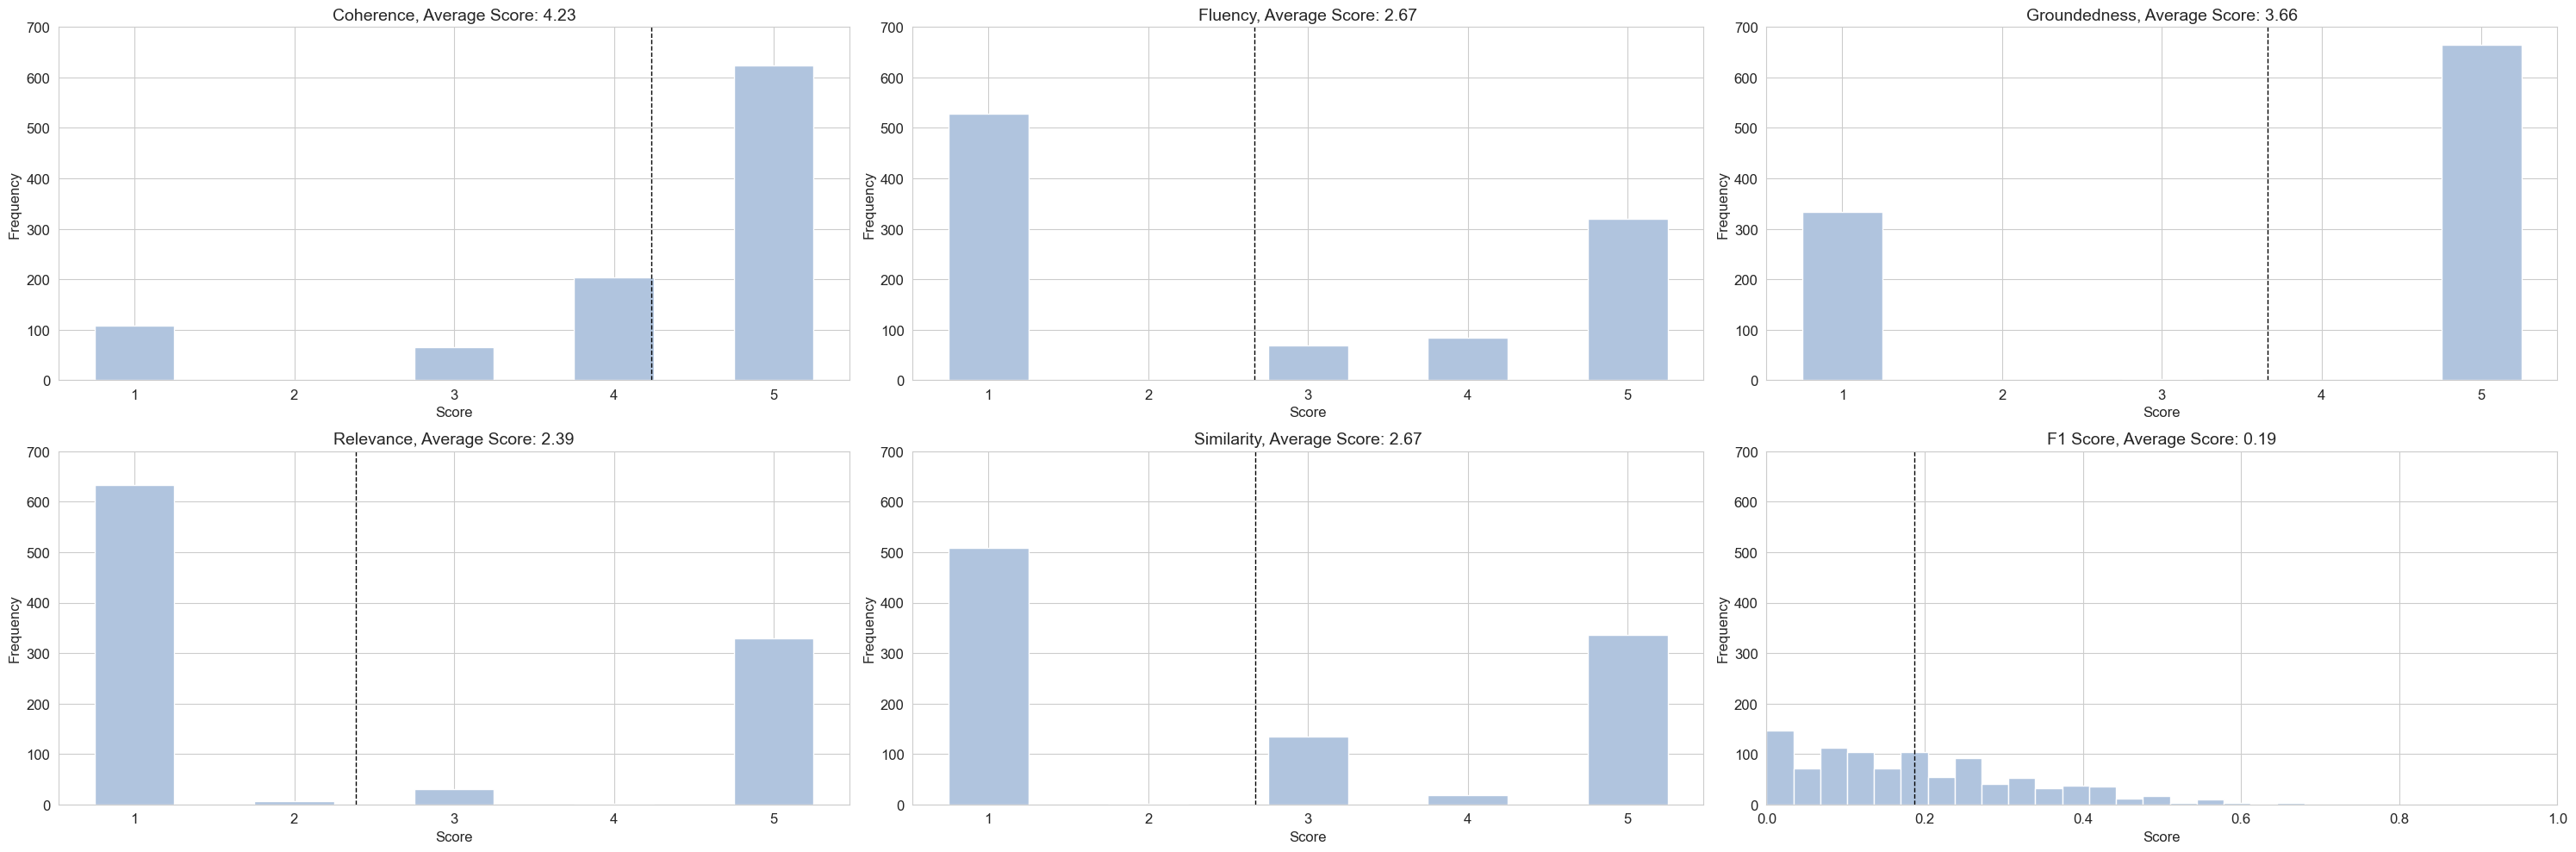

In [196]:
metrics = ['gpt_coherence', 'gpt_fluency', 'gpt_groundedness', 'gpt_relevance', 'gpt_similarity', 'f1_score']

sns.set_style('whitegrid')


fig, axes = plt.subplots(2, 3, figsize=(30, 10))

for ax, metric in zip(axes.flatten(), metrics): 
    data = base_df[metric]
    if metric == 'f1_score':
        ax.hist(data, color='lightsteelblue', bins=20) 
        ax.set_xlim(0, 1)
    else:
        values = [1, 2, 3, 4, 5]
        counts = [np.sum(data == value) for value in values]
        ax.bar(values, counts, width=0.5, color='lightsteelblue')
    
    ax.set_xlabel('Score', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_ylim(0, 700)
    
    average_score = np.mean(data)
    ax.axvline(average_score, color='black', linestyle='--', linewidth=1)
    if metric == 'f1_score':
        ax.set_title(f"F1 Score, Average Score: {average_score:.2f}", fontsize=14)
    else:
        ax.set_title(f"{metric.split('_')[-1].title()}, Average Score: {average_score:.2f}", fontsize=14)
    
    ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

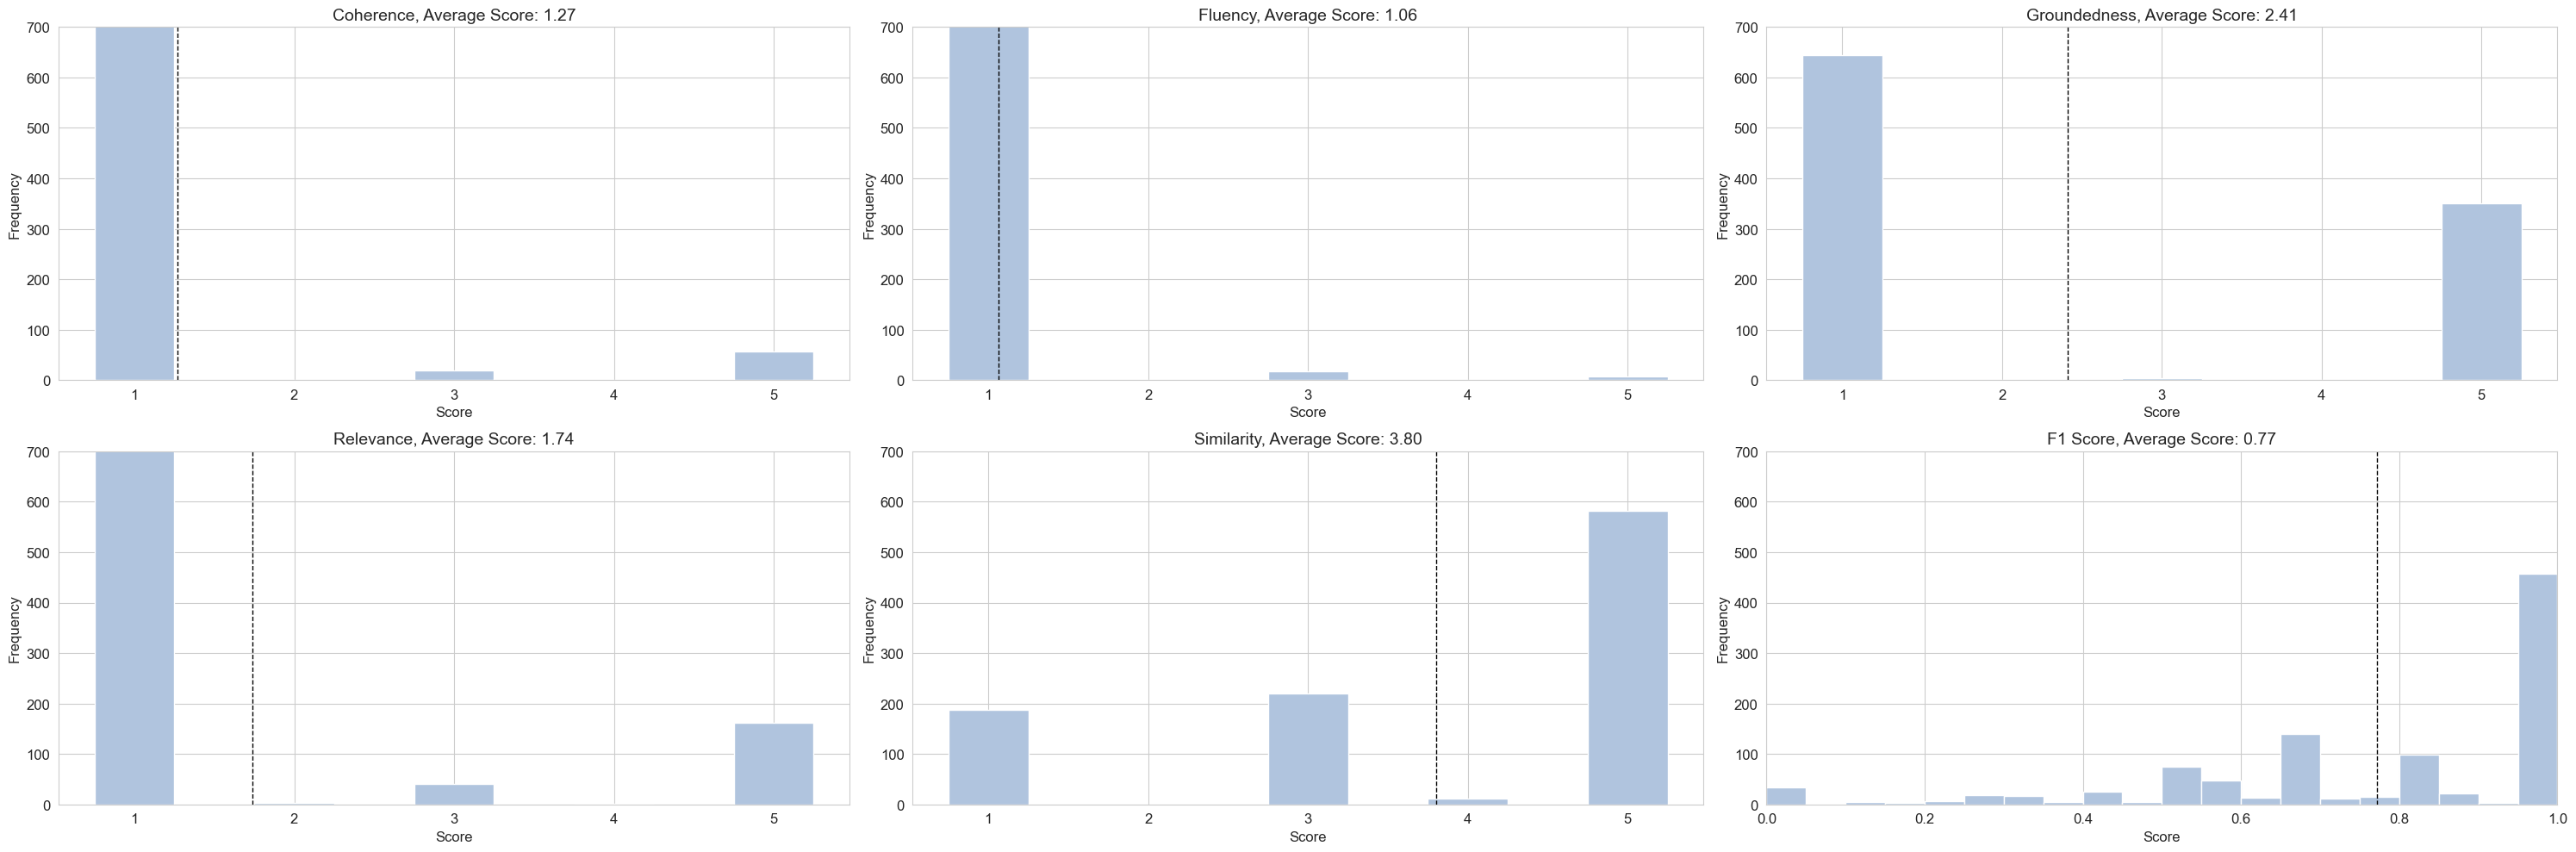

In [197]:
metrics = ['gpt_coherence', 'gpt_fluency', 'gpt_groundedness', 'gpt_relevance', 'gpt_similarity', 'f1_score']

sns.set_style('whitegrid')


fig, axes = plt.subplots(2, 3, figsize=(30, 10))

for ax, metric in zip(axes.flatten(), metrics): 
    data = tune_df[metric]
    if metric == 'f1_score':
        ax.hist(data, color='lightsteelblue', bins=20) 
        ax.set_xlim(0, 1)
    else:
        values = [1, 2, 3, 4, 5]
        counts = [np.sum(data == value) for value in values]
        ax.bar(values, counts, width=0.5, color='lightsteelblue')
    
    ax.set_xlabel('Score', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_ylim(0, 700)
    
    average_score = np.mean(data)
    ax.axvline(average_score, color='black', linestyle='--', linewidth=1)
    if metric == 'f1_score':
        ax.set_title(f"F1 Score, Average Score: {average_score:.2f}", fontsize=14)
    else:
        ax.set_title(f"{metric.split('_')[-1].title()}, Average Score: {average_score:.2f}", fontsize=14)
    
    ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

In [108]:
base_df.columns

Index(['prompt', 'true_answer', 'model_answer', 'accuracy', 'precision',
       'recall', 'f1', 'bleu', 'rouge1_precision', 'rouge1_recall',
       'rouge1_f1', 'rouge2_precision', 'rouge2_recall', 'rouge2_f1',
       'rougeL_precision', 'rougeL_recall', 'rougeL_f1', 'rougeLSum_precision',
       'rougeLSum_recall', 'rougeLSum_f1'],
      dtype='object')

In [42]:
base_df = pd.read_csv('C:/Users/KornkamolSampaongern/LLMInformationExtraction/data/output/azure-ai-gpt35/squad/records_metrics_model_response_base_model.csv')
tune_df = pd.read_csv('C:/Users/KornkamolSampaongern/LLMInformationExtraction/data/output/azure-ai-gpt35/squad/records_metrics_model_response_tuned_model.csv')

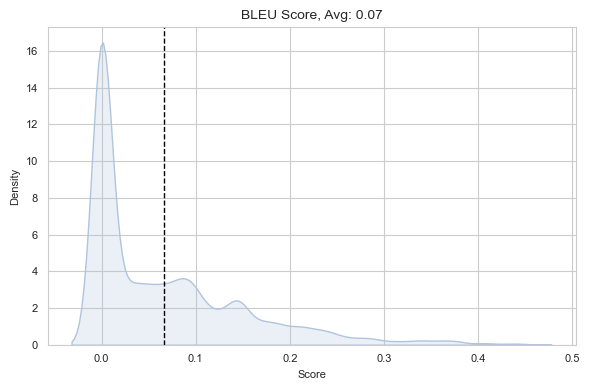

In [43]:
metrics = ['bleu']
metric = metrics[0]
data = base_df[metric]

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(6, 4))

sns.kdeplot(data, ax=ax, color='lightsteelblue', fill=True, bw_adjust=0.5)

ax.set_xlabel('Score', fontsize=8)
ax.set_ylabel('Density', fontsize=8)

average_score = np.mean(data)
ax.axvline(average_score, color='black', linestyle='--', linewidth=1)
ax.set_title(f"BLEU Score, Avg: {average_score:.2f}", fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=8)
plt.tight_layout()

plt.show()

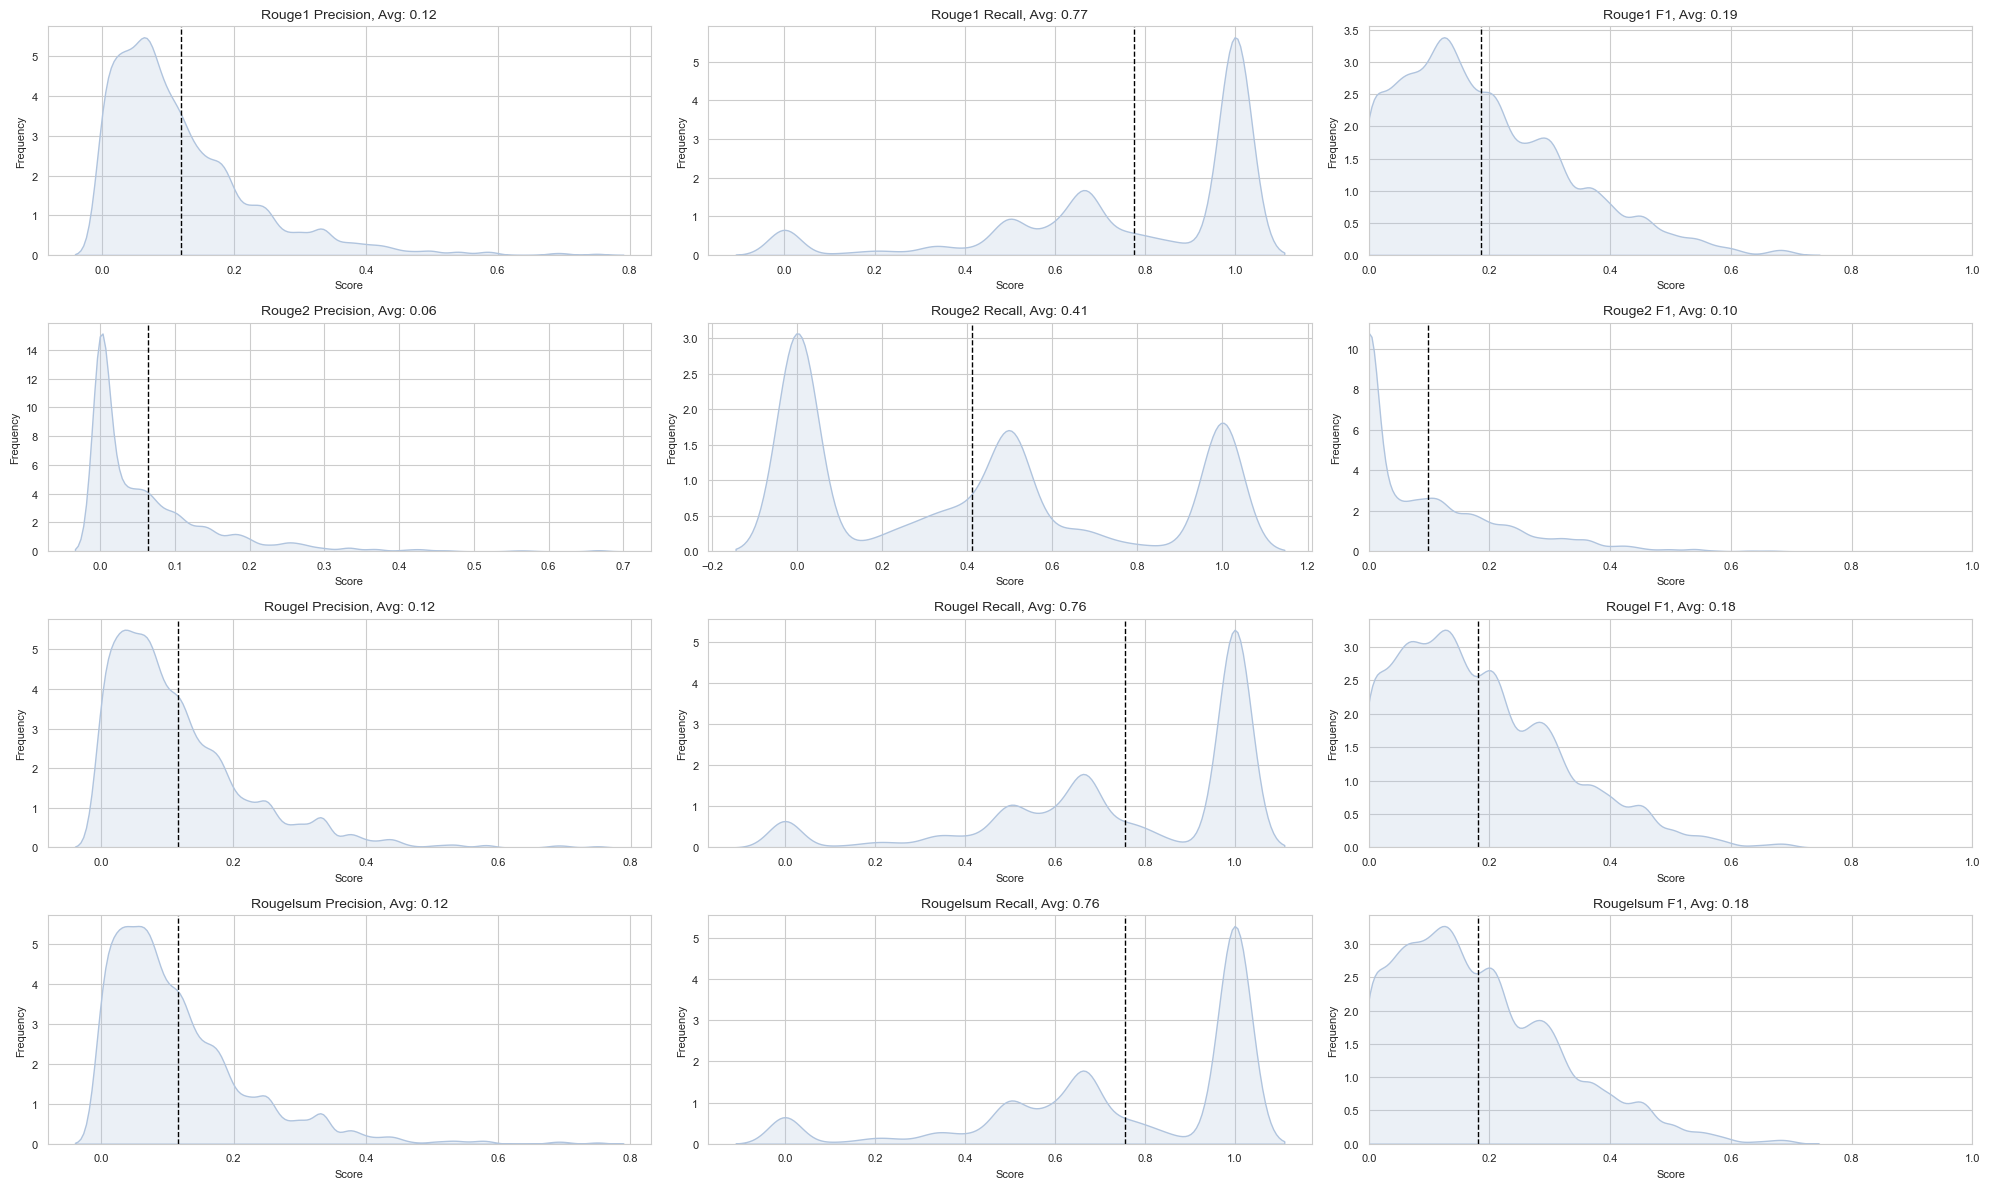

In [4]:
metrics = ['rouge1_precision', 'rouge1_recall', 'rouge1_f1', 
           'rouge2_precision', 'rouge2_recall', 'rouge2_f1',
           'rougeL_precision', 'rougeL_recall', 'rougeL_f1', 
           'rougeLSum_precision', 'rougeLSum_recall', 'rougeLSum_f1']

sns.set_style('whitegrid')

fig, axes = plt.subplots(4, 3, figsize=(20, 12))
axes = axes.flatten()
for ax, metric in zip(axes, metrics):
    data = base_df[metric]
    
    sns.kdeplot(data, ax=ax, color='lightsteelblue', fill=True, bw_adjust=0.5)
    
    if 'f1' in metric:
        ax.set_xlim(0, 1)
    
    ax.set_xlabel('Score', fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)

    average_score = np.mean(data)
    ax.axvline(average_score, color='black', linestyle='--', linewidth=1)

    ax.set_title(f"{metric.replace('_', ' ').title()}, Avg: {average_score:.2f}", fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()
plt.show()

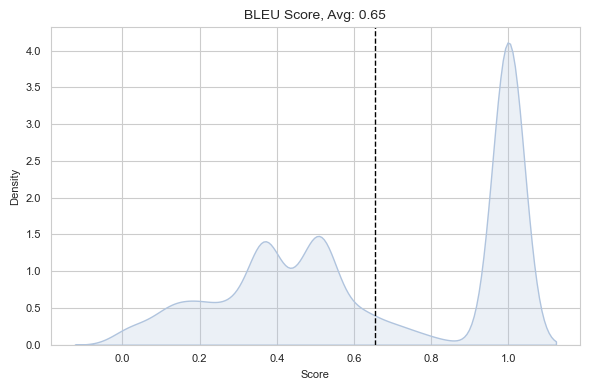

In [45]:
metrics = ['bleu']
metric = metrics[0]
data = tune_df[metric]

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(6, 4))

sns.kdeplot(data, ax=ax, color='lightsteelblue', fill=True, bw_adjust=0.5)

ax.set_xlabel('Score', fontsize=8)
ax.set_ylabel('Density', fontsize=8)

average_score = np.mean(data)
ax.axvline(average_score, color='black', linestyle='--', linewidth=1)
ax.set_title(f"BLEU Score, Avg: {average_score:.2f}", fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=8)
plt.tight_layout()

plt.show()

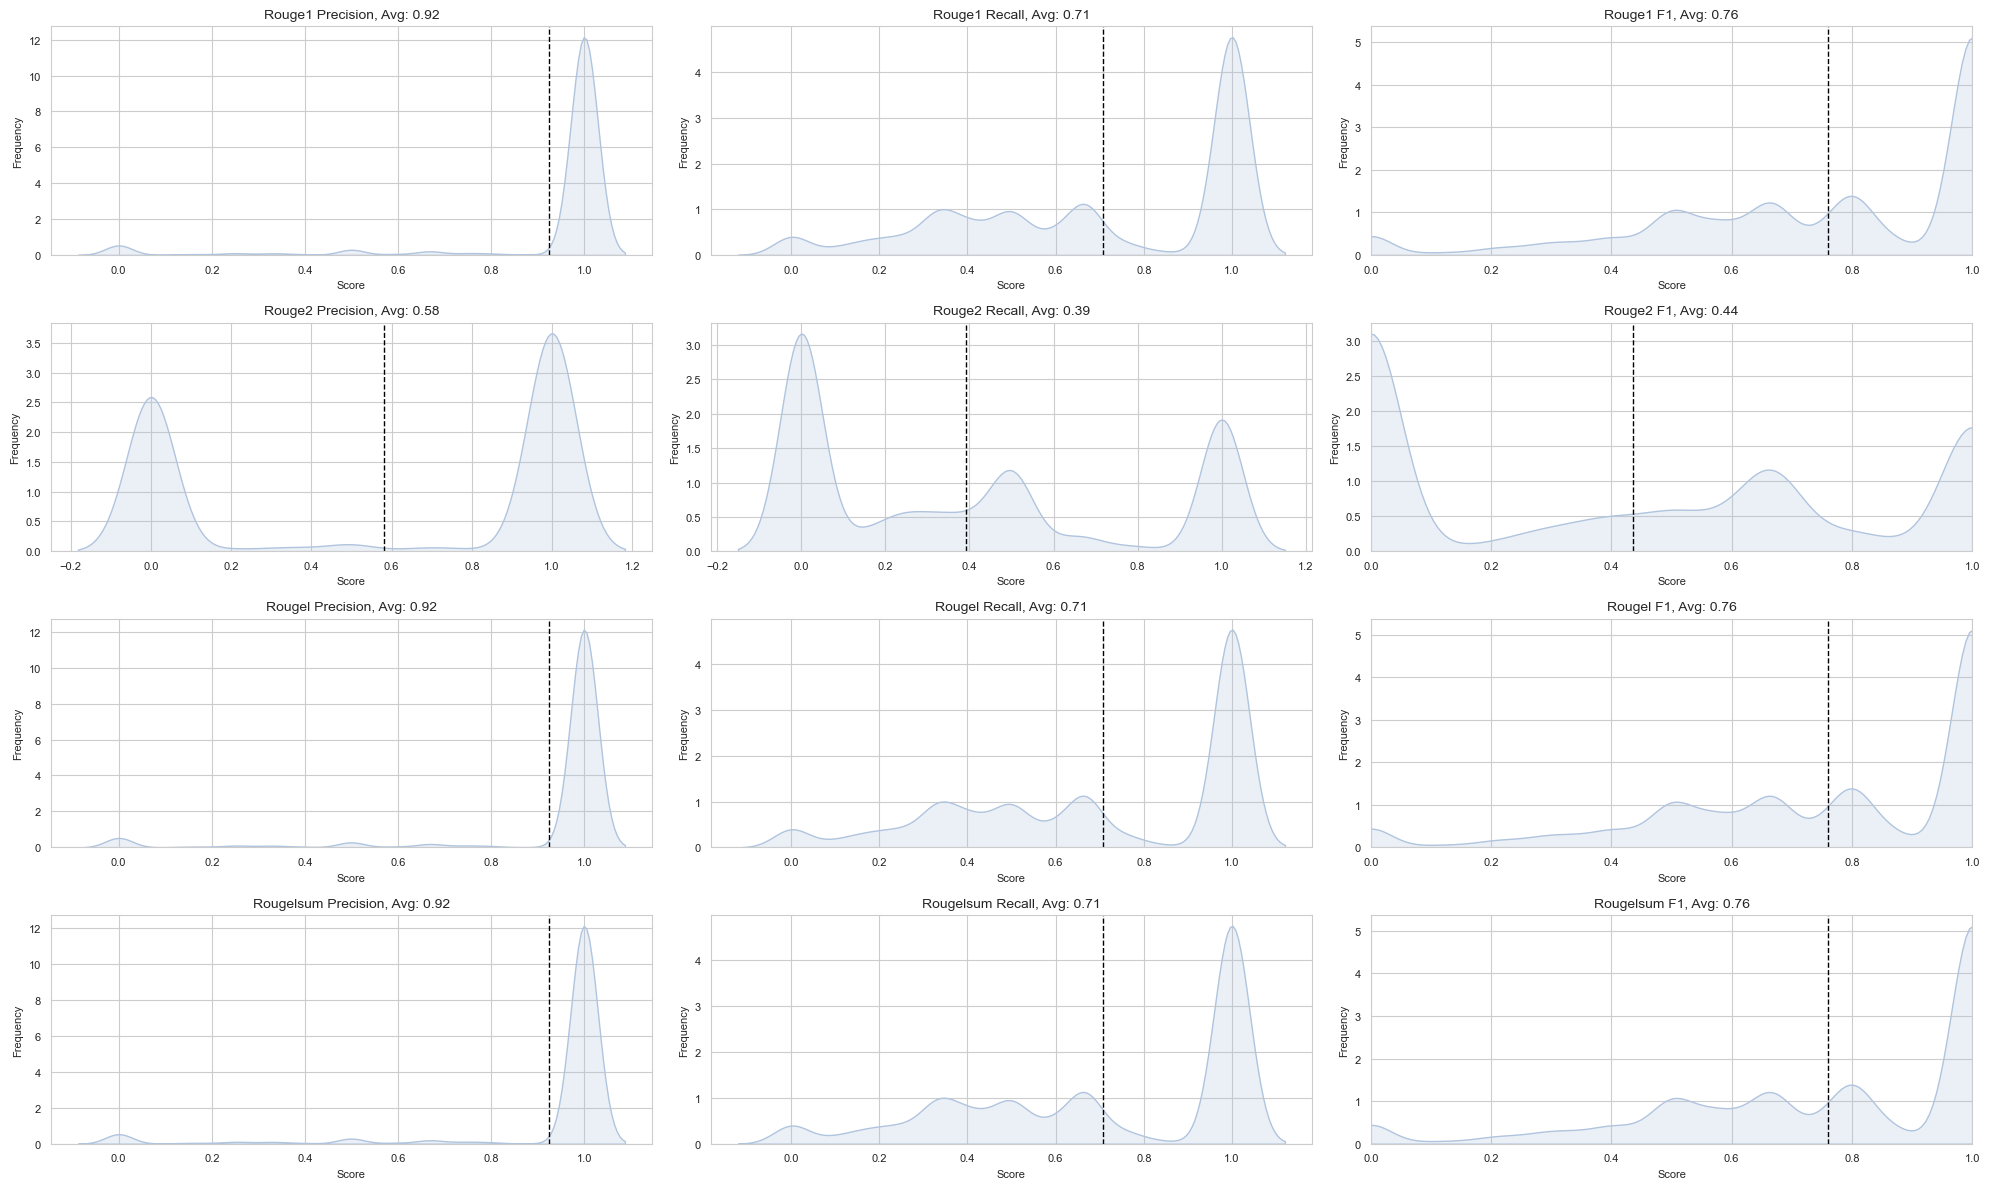

In [6]:
metrics = ['rouge1_precision', 'rouge1_recall', 'rouge1_f1', 
           'rouge2_precision', 'rouge2_recall', 'rouge2_f1',
           'rougeL_precision', 'rougeL_recall', 'rougeL_f1', 
           'rougeLSum_precision', 'rougeLSum_recall', 'rougeLSum_f1']

sns.set_style('whitegrid')

fig, axes = plt.subplots(4, 3, figsize=(20, 12))
axes = axes.flatten()
for ax, metric in zip(axes, metrics):
    data = tune_df[metric]
    
    sns.kdeplot(data, ax=ax, color='lightsteelblue', fill=True, bw_adjust=0.5)
    
    if 'f1' in metric:
        ax.set_xlim(0, 1)
    
    ax.set_xlabel('Score', fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)

    average_score = np.mean(data)
    ax.axvline(average_score, color='black', linestyle='--', linewidth=1)

    ax.set_title(f"{metric.replace('_', ' ').title()}, Avg: {average_score:.2f}", fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()
plt.show()

In [48]:
base_df = pd.read_csv('C:/Users/KornkamolSampaongern/LLMInformationExtraction/data/output/custom-gpt35/squad/records_metrics_model_response__base_gpt-3.5-turbo.csv')
tune_df = pd.read_csv('C:/Users/KornkamolSampaongern/LLMInformationExtraction/data/output/custom-gpt35/squad/records_metrics_model_response__9tGlpqli.csv')

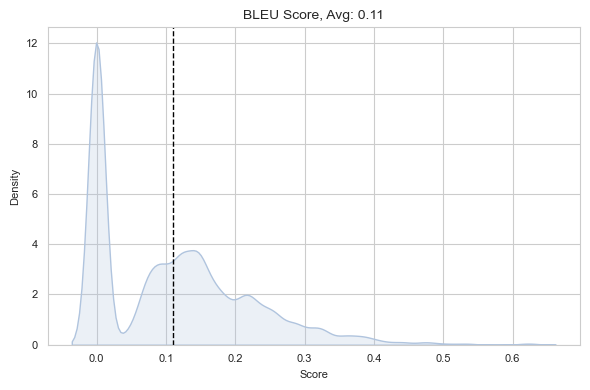

In [40]:
metrics = ['bleu']
metric = metrics[0]
data = base_df[metric]

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(6, 4))

sns.kdeplot(data, ax=ax, color='lightsteelblue', fill=True, bw_adjust=0.5)

ax.set_xlabel('Score', fontsize=8)
ax.set_ylabel('Density', fontsize=8)

average_score = np.mean(data)
ax.axvline(average_score, color='black', linestyle='--', linewidth=1)
ax.set_title(f"BLEU Score, Avg: {average_score:.2f}", fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=8)
plt.tight_layout()

plt.show()

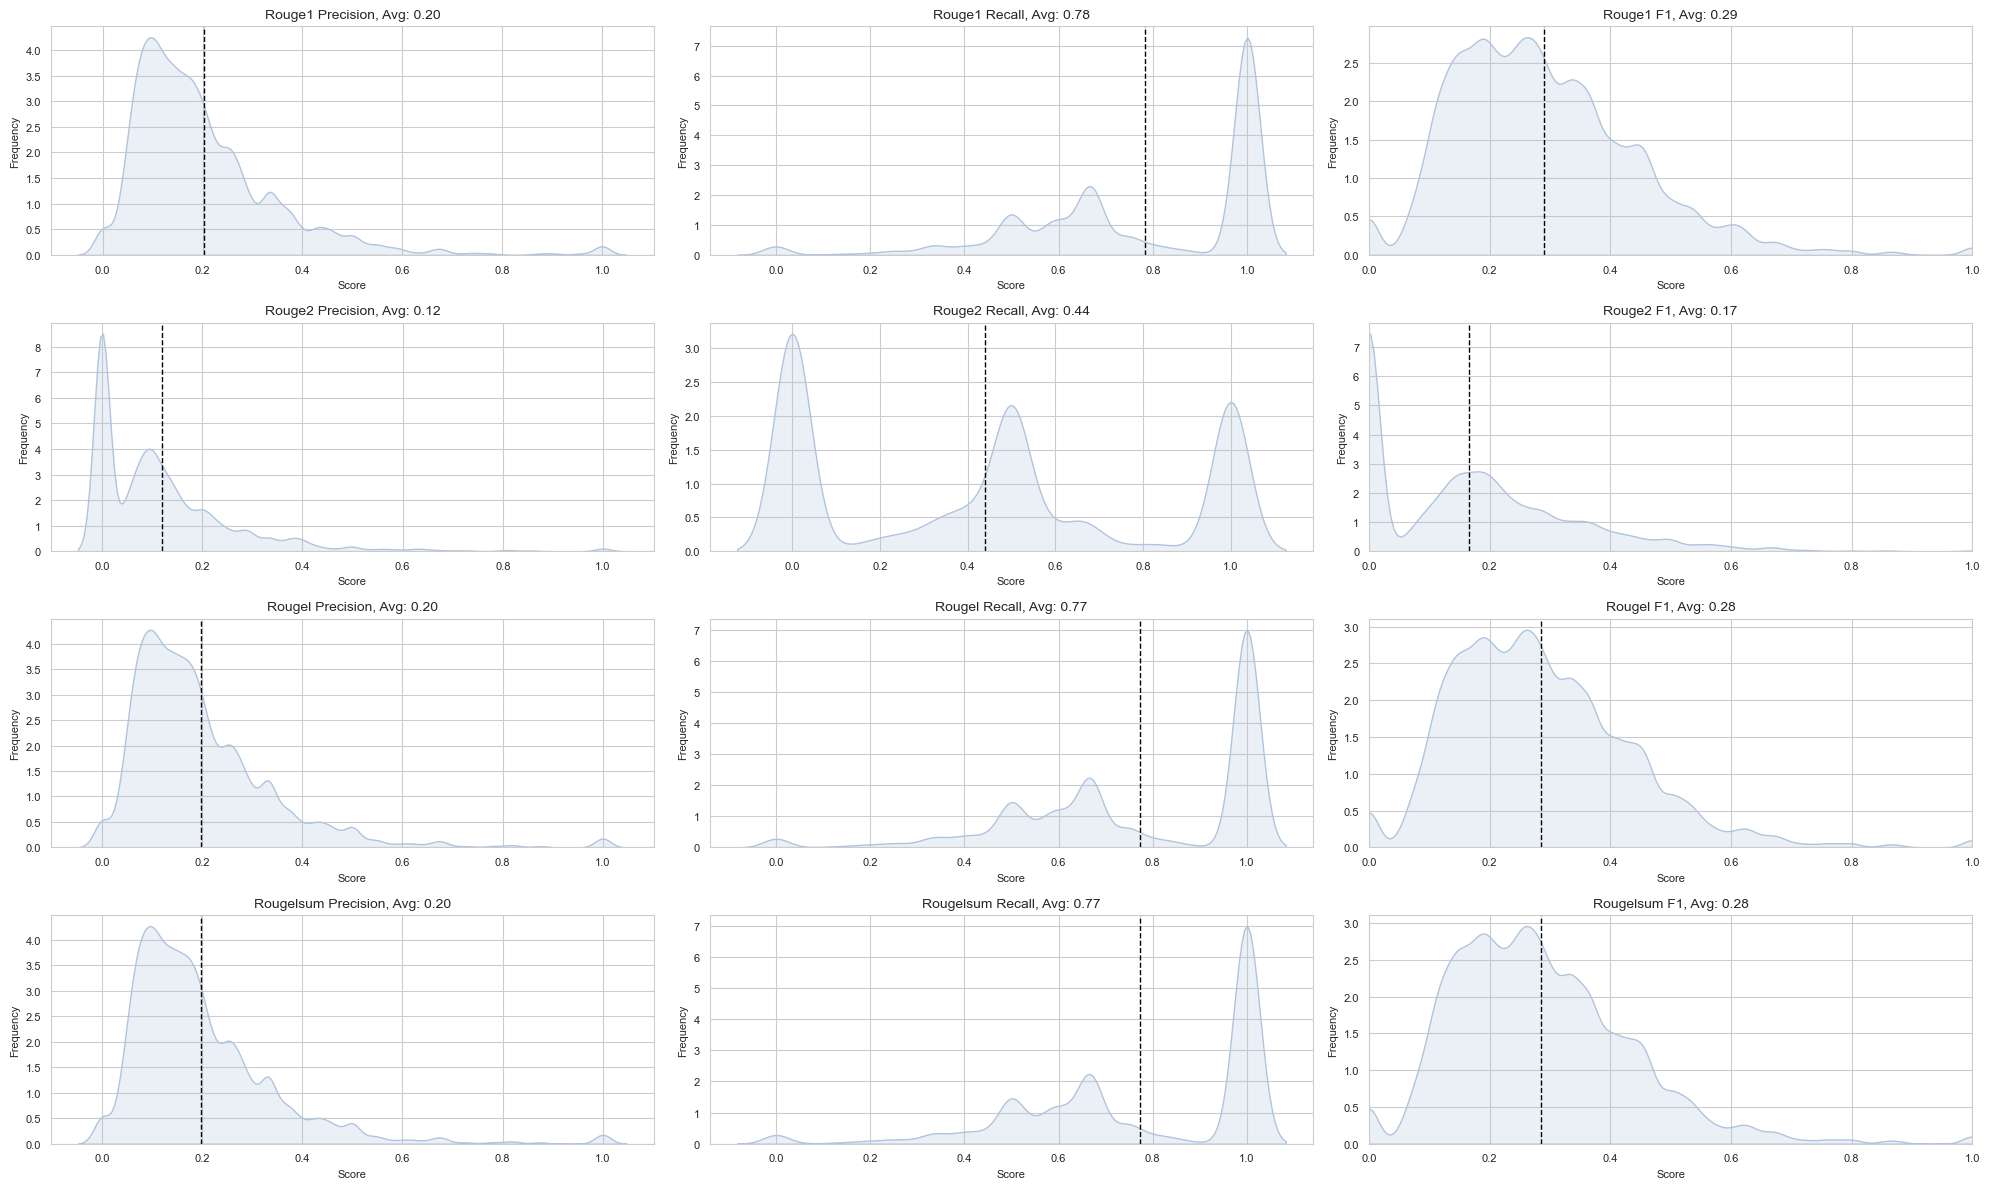

In [49]:
metrics = ['rouge1_precision', 'rouge1_recall', 'rouge1_f1', 
           'rouge2_precision', 'rouge2_recall', 'rouge2_f1',
           'rougeL_precision', 'rougeL_recall', 'rougeL_f1', 
           'rougeLSum_precision', 'rougeLSum_recall', 'rougeLSum_f1']

sns.set_style('whitegrid')

fig, axes = plt.subplots(4, 3, figsize=(20, 12))
axes = axes.flatten()
for ax, metric in zip(axes, metrics):
    data = base_df[metric]
    
    sns.kdeplot(data, ax=ax, color='lightsteelblue', fill=True, bw_adjust=0.5)
    
    if 'f1' in metric:
        ax.set_xlim(0, 1)
    
    ax.set_xlabel('Score', fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)

    average_score = np.mean(data)
    ax.axvline(average_score, color='black', linestyle='--', linewidth=1)

    ax.set_title(f"{metric.replace('_', ' ').title()}, Avg: {average_score:.2f}", fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()
plt.show()

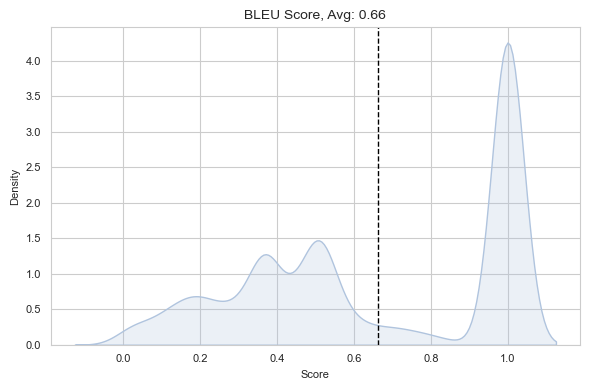

In [41]:
metrics = ['bleu']
metric = metrics[0]
data = tune_df[metric]

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(6, 4))

sns.kdeplot(data, ax=ax, color='lightsteelblue', fill=True, bw_adjust=0.5)

ax.set_xlabel('Score', fontsize=8)
ax.set_ylabel('Density', fontsize=8)

average_score = np.mean(data)
ax.axvline(average_score, color='black', linestyle='--', linewidth=1)
ax.set_title(f"BLEU Score, Avg: {average_score:.2f}", fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=8)
plt.tight_layout()

plt.show()

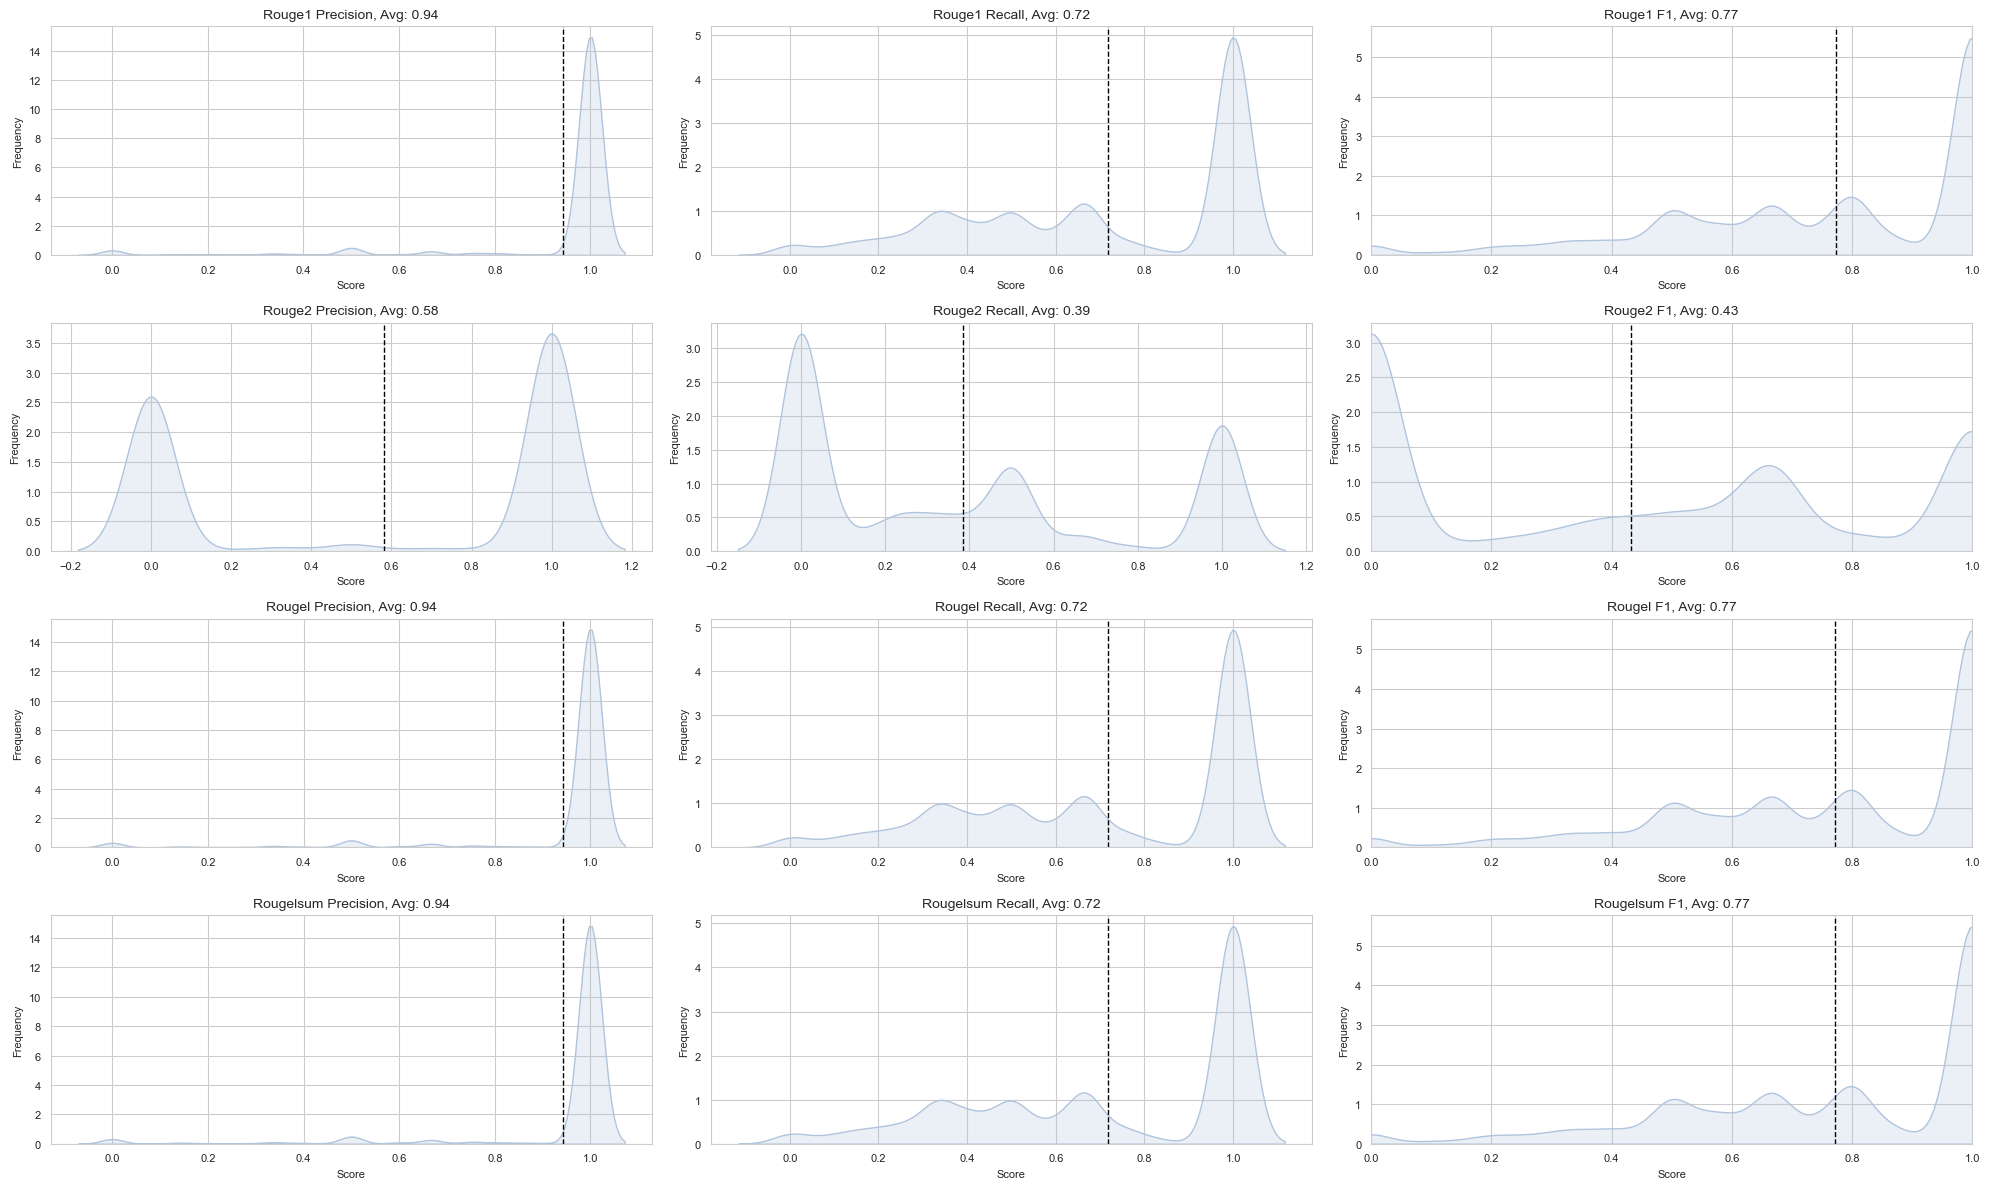

In [50]:
metrics = ['rouge1_precision', 'rouge1_recall', 'rouge1_f1', 
           'rouge2_precision', 'rouge2_recall', 'rouge2_f1',
           'rougeL_precision', 'rougeL_recall', 'rougeL_f1', 
           'rougeLSum_precision', 'rougeLSum_recall', 'rougeLSum_f1']

sns.set_style('whitegrid')

fig, axes = plt.subplots(4, 3, figsize=(20, 12))
axes = axes.flatten()
for ax, metric in zip(axes, metrics):
    data = tune_df[metric]
    
    sns.kdeplot(data, ax=ax, color='lightsteelblue', fill=True, bw_adjust=0.5)
    
    if 'f1' in metric:
        ax.set_xlim(0, 1)
    
    ax.set_xlabel('Score', fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)

    average_score = np.mean(data)
    ax.axvline(average_score, color='black', linestyle='--', linewidth=1)

    ax.set_title(f"{metric.replace('_', ' ').title()}, Avg: {average_score:.2f}", fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()
plt.show()

In [126]:
training_log_df = pd.read_csv('C:/Users/KornkamolSampaongern/LLMInformationExtraction/data/output/custom-gpt35/squad/logs/decoded-20240911093548.csv')

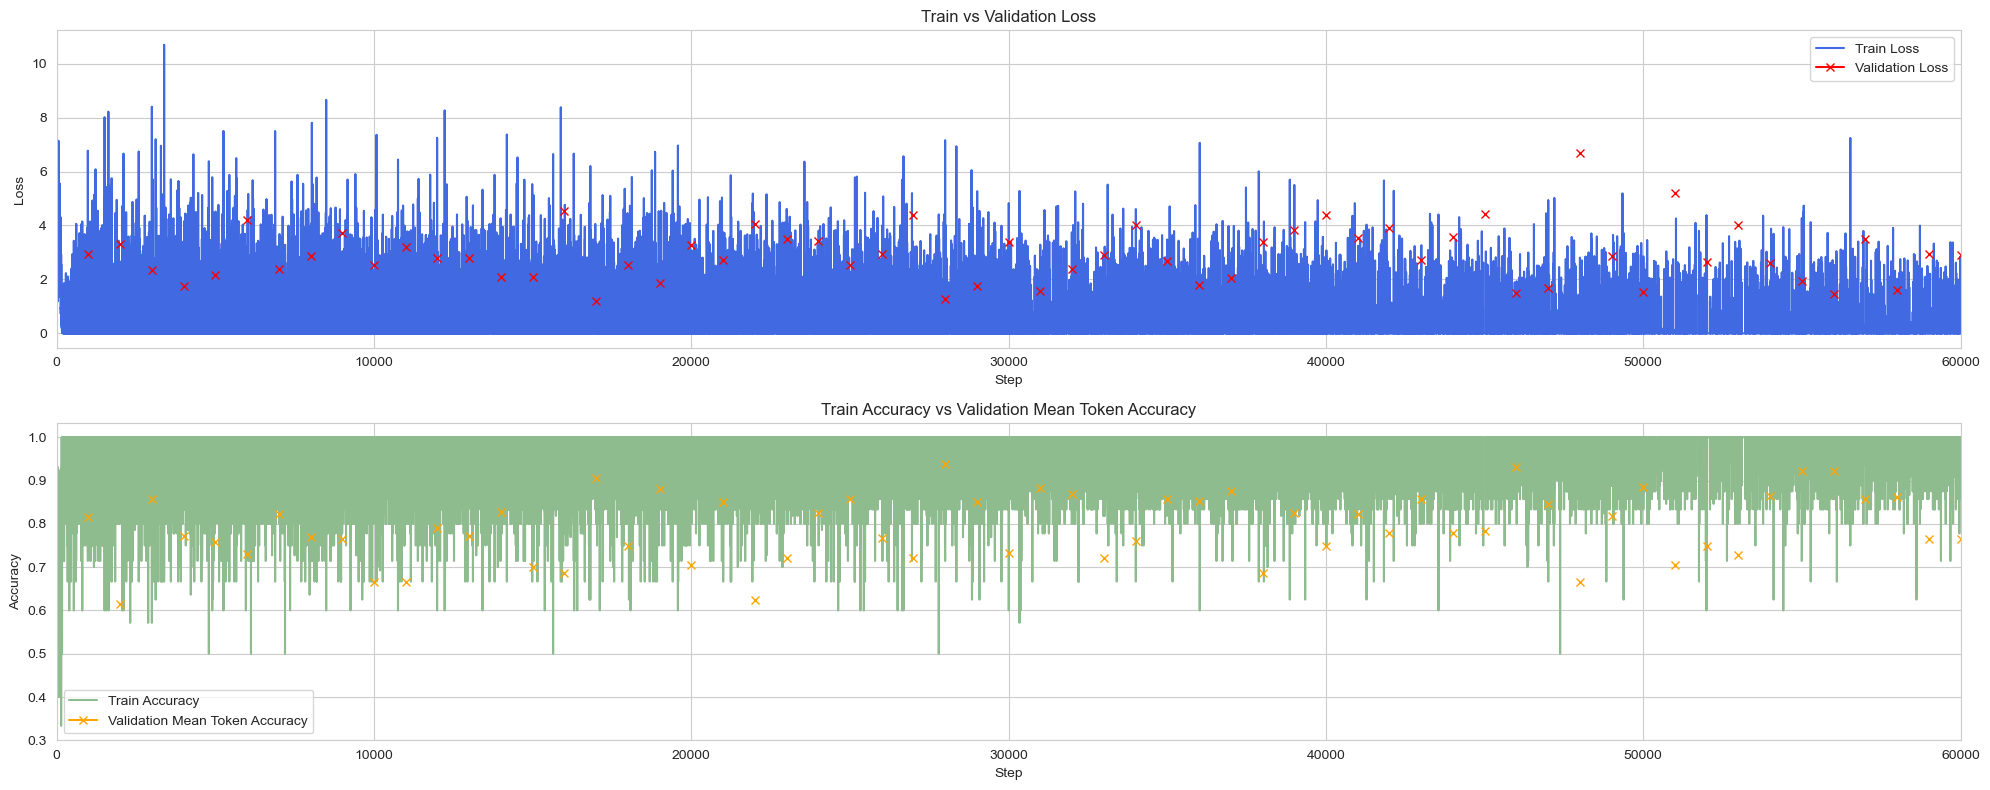

In [149]:
fig, axs = plt.subplots(2, 1, figsize=(20, 8))

axs[0].plot(training_log_df['step'], training_log_df['train_loss'], label='Train Loss', color='royalblue')
axs[0].plot(training_log_df['step'], training_log_df['valid_loss'], label='Validation Loss', color='red', marker='x')
axs[0].set_xlabel('Step')
axs[0].set_ylabel('Loss')
axs[0].set_title('Train vs Validation Loss')
axs[0].legend()
axs[0].grid(True)
axs[0].set_xlim(0, 60000)

axs[1].plot(training_log_df['step'], training_log_df['train_accuracy'], label='Train Accuracy', color='darkseagreen')
axs[1].plot(training_log_df['step'], training_log_df['valid_mean_token_accuracy'], label='Validation Mean Token Accuracy', color='orange', marker='x')
axs[1].set_xlabel('Step')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Train Accuracy vs Validation Mean Token Accuracy')
axs[1].legend()
axs[1].grid(True)
axs[1].set_xlim(0, 60000)

plt.tight_layout()

plt.show()

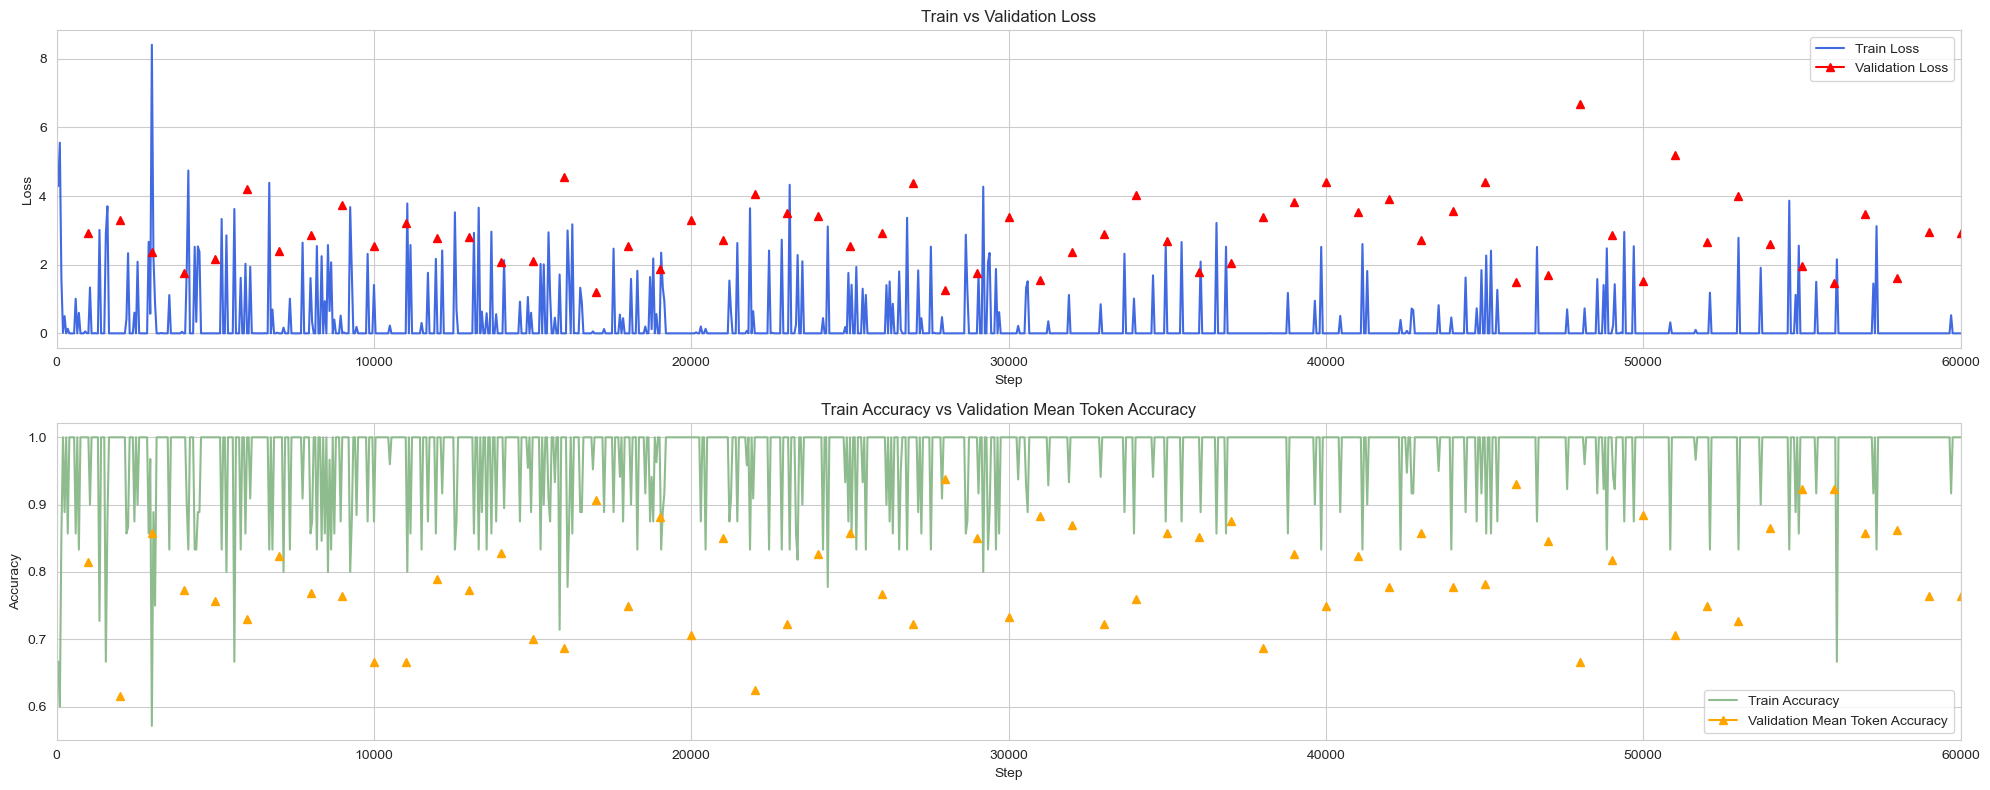

In [176]:
step_interval = 50

# Filter the data to only include every 100th step
filtered_df = training_log_df[training_log_df['step'] % step_interval == 0]

fig, axs = plt.subplots(2, 1, figsize=(20, 8))

# Plot Train Loss vs Validation Loss
axs[0].plot(filtered_df['step'], filtered_df['train_loss'], label='Train Loss', color='royalblue')
axs[0].plot(filtered_df['step'], filtered_df['valid_loss'], label='Validation Loss', color='red', marker='^')
axs[0].set_xlabel('Step')
axs[0].set_ylabel('Loss')
axs[0].set_title('Train vs Validation Loss')
axs[0].legend()
axs[0].grid(True)
axs[0].set_xlim(0, 60000)

# Plot Train Accuracy vs Validation Mean Token Accuracy
axs[1].plot(filtered_df['step'], filtered_df['train_accuracy'], label='Train Accuracy', color='darkseagreen')
axs[1].plot(filtered_df['step'], filtered_df['valid_mean_token_accuracy'], label='Validation Mean Token Accuracy', color='orange', marker='^')
axs[1].set_xlabel('Step')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Train Accuracy vs Validation Mean Token Accuracy')
axs[1].legend()
axs[1].grid(True)
axs[1].set_xlim(0, 60000)

plt.tight_layout()

plt.show()

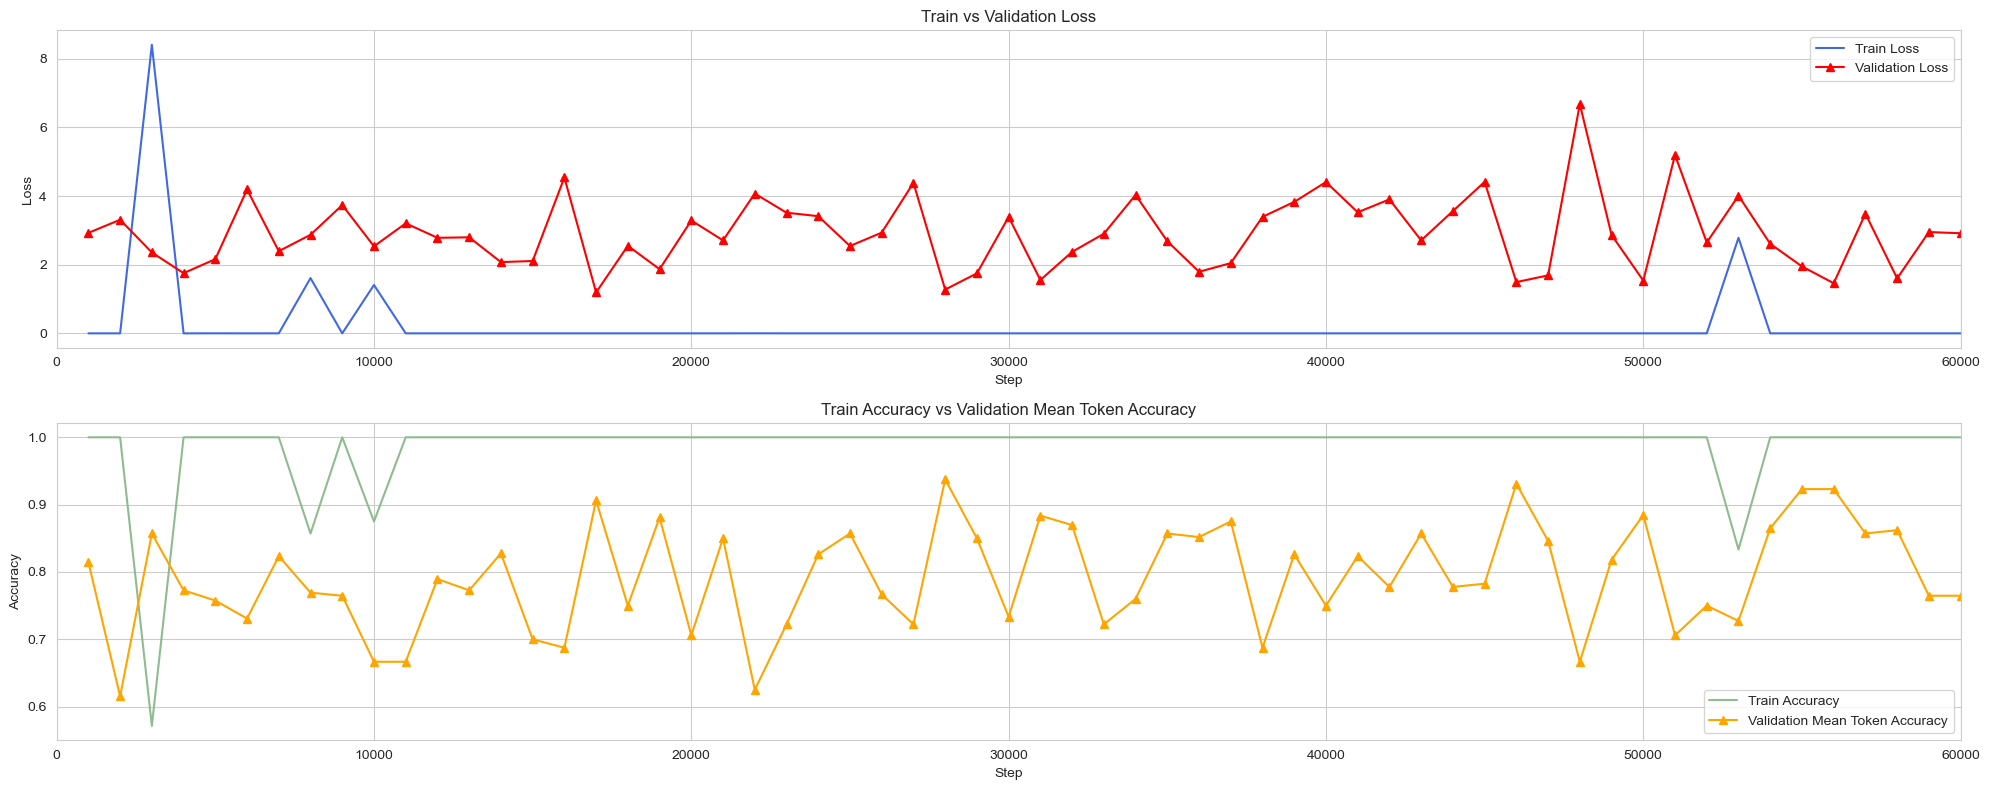

In [163]:
step_interval = 1000

# Filter the data to only include every 100th step
filtered_df = training_log_df[training_log_df['step'] % step_interval == 0]

fig, axs = plt.subplots(2, 1, figsize=(20, 8))

# Plot Train Loss vs Validation Loss
axs[0].plot(filtered_df['step'], filtered_df['train_loss'], label='Train Loss', color='royalblue')
axs[0].plot(filtered_df['step'], filtered_df['valid_loss'], label='Validation Loss', color='red', marker='^')
axs[0].set_xlabel('Step')
axs[0].set_ylabel('Loss')
axs[0].set_title('Train vs Validation Loss')
axs[0].legend()
axs[0].grid(True)
axs[0].set_xlim(0, 60000)

# Plot Train Accuracy vs Validation Mean Token Accuracy
axs[1].plot(filtered_df['step'], filtered_df['train_accuracy'], label='Train Accuracy', color='darkseagreen')
axs[1].plot(filtered_df['step'], filtered_df['valid_mean_token_accuracy'], label='Validation Mean Token Accuracy', color='orange', marker='^')
axs[1].set_xlabel('Step')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Train Accuracy vs Validation Mean Token Accuracy')
axs[1].legend()
axs[1].grid(True)
axs[1].set_xlim(0, 60000)

plt.tight_layout()

plt.show()

In [164]:
azure_tune_df = pd.read_csv('C:/Users/KornkamolSampaongern/LLMInformationExtraction/data/output/azure-ai-gpt35/squad/log/log.csv')

In [166]:
azure_tune_df.columns

Index(['step', 'train_loss', 'train_mean_token_accuracy', 'valid_loss',
       'valid_mean_token_accuracy', 'full_valid_loss',
       'full_valid_mean_token_accuracy'],
      dtype='object')

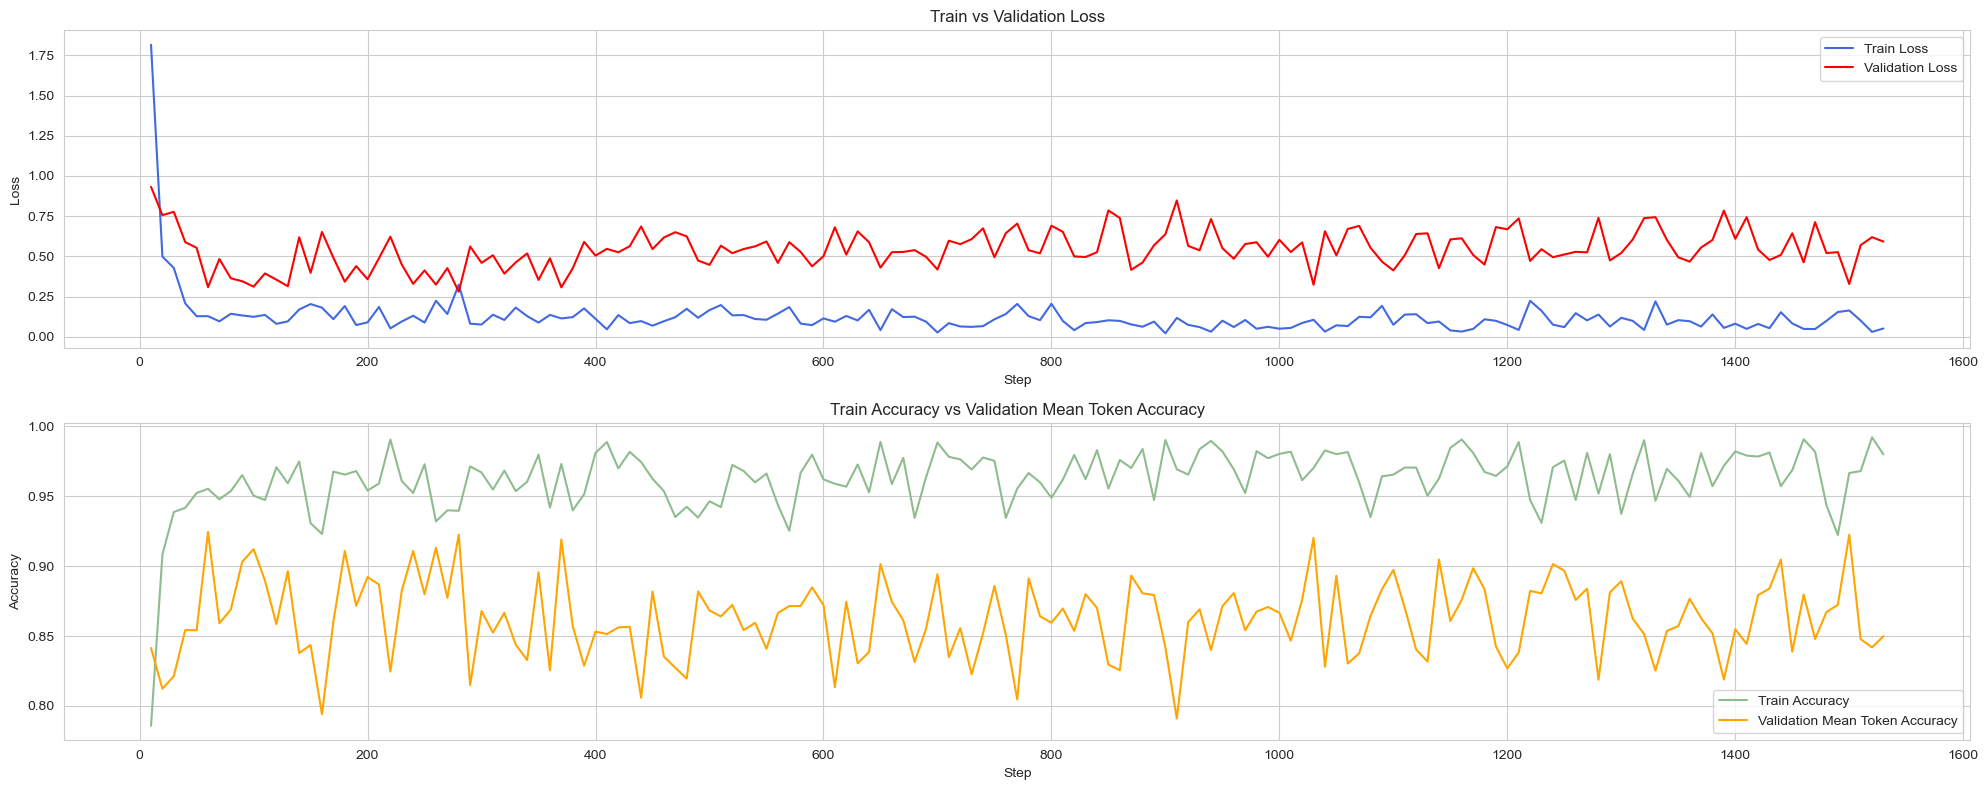

In [171]:
step_interval = 10

# Filter the data to only include every 100th step
filtered_df = azure_tune_df[azure_tune_df['step'] % step_interval == 0]

fig, axs = plt.subplots(2, 1, figsize=(20, 8))

# Plot Train Loss vs Validation Loss
axs[0].plot(filtered_df['step'], filtered_df['train_loss'], label='Train Loss', color='royalblue')
axs[0].plot(filtered_df['step'], filtered_df['valid_loss'], label='Validation Loss', color='red')
axs[0].set_xlabel('Step')
axs[0].set_ylabel('Loss')
axs[0].set_title('Train vs Validation Loss')
axs[0].legend()
axs[0].grid(True)
# axs[0].set_xlim(0, 60000)

# Plot Train Accuracy vs Validation Mean Token Accuracy
axs[1].plot(filtered_df['step'], filtered_df['train_mean_token_accuracy'], label='Train Accuracy', color='darkseagreen')
axs[1].plot(filtered_df['step'], filtered_df['valid_mean_token_accuracy'], label='Validation Mean Token Accuracy', color='orange')
axs[1].set_xlabel('Step')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Train Accuracy vs Validation Mean Token Accuracy')
axs[1].legend()
axs[1].grid(True)
# axs[1].set_xlim(0, 60000)

plt.tight_layout()

plt.show()

In [51]:
base_df = pd.read_csv('C:/Users/KornkamolSampaongern/LLMInformationExtraction/data/output/azure-ai-gpt35/project_description/records_metrics_evaluation_project_description Base Model_Output_Table_09-2-2024-18-40.csv')
tune_1000_df = pd.read_csv('C:/Users/KornkamolSampaongern/LLMInformationExtraction/data/output/azure-ai-gpt35/project_description/records_metrics_evaluation_project_description 1000 Tune_Output_Table_09-2-2024-18-40.csv')
tune_7000_df = pd.read_csv('C:/Users/KornkamolSampaongern/LLMInformationExtraction/data/output/azure-ai-gpt35/project_description/records_metrics_evaluation_project_description 7000 Tune_Output_Table_09-2-2024-18-40.csv')

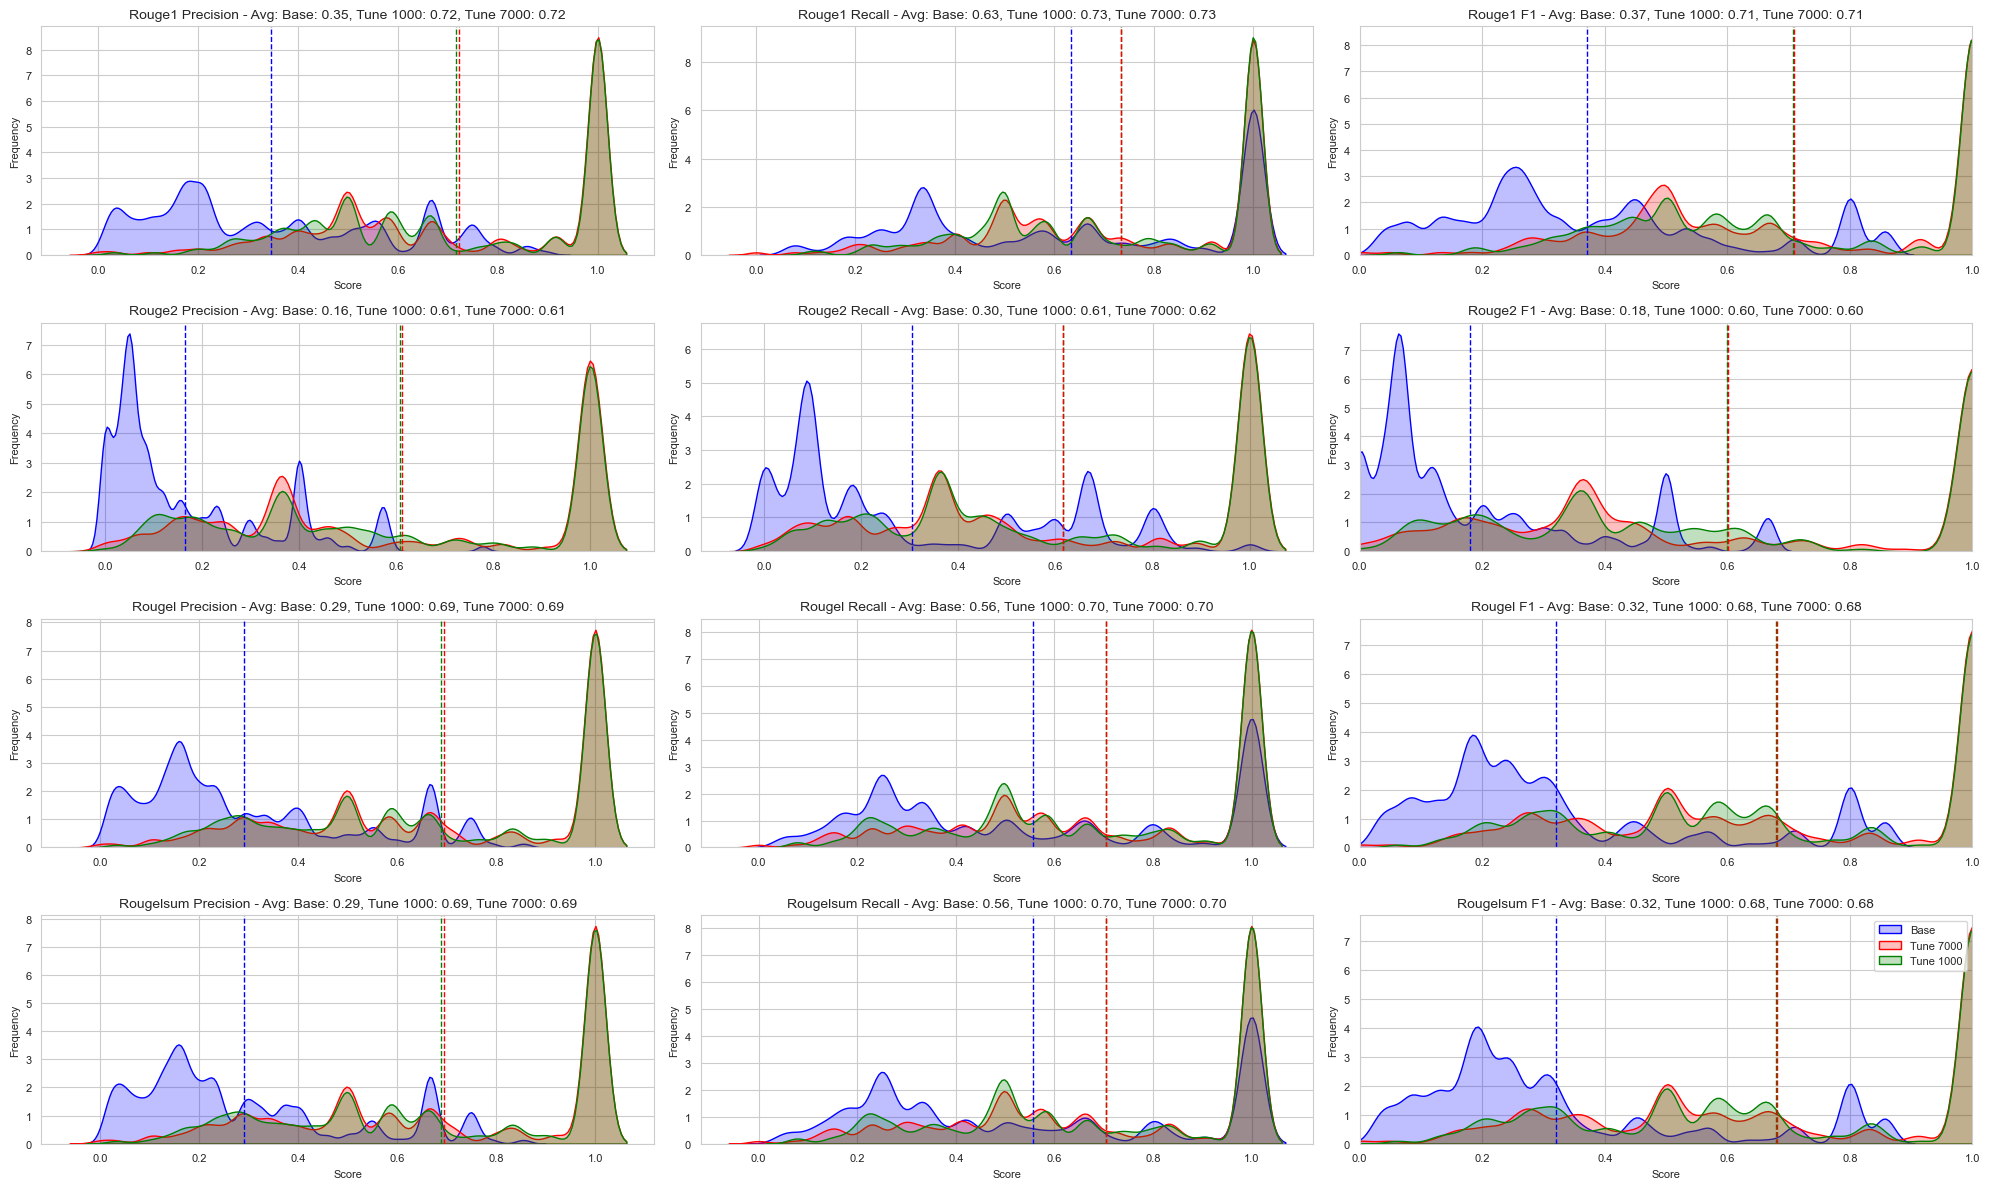

In [60]:
metrics = [
    'rouge1_precision', 'rouge1_recall', 'rouge1_f1', 
    'rouge2_precision', 'rouge2_recall', 'rouge2_f1',
    'rougeL_precision', 'rougeL_recall', 'rougeL_f1', 
    'rougeLSum_precision', 'rougeLSum_recall', 'rougeLSum_f1'
]

# Set style for the plot
sns.set_style('whitegrid')

# Create subplots
fig, axes = plt.subplots(4, 3, figsize=(20, 12))
axes = axes.flatten()

# Colors for the datasets
colors = {'base_df': 'blue', 'tune_1000_df': 'green', 'tune_7000_df': 'red'}

# Plot each metric for the three dataframes
for ax, metric in zip(axes, metrics):
    # Plot KDE for each dataframe
    sns.kdeplot(base_df[metric], ax=ax, color=colors['base_df'], fill=True, bw_adjust=0.2, label='Base')
    sns.kdeplot(tune_7000_df[metric], ax=ax, color=colors['tune_7000_df'], fill=True, bw_adjust=0.2, label='Tune 7000')
    sns.kdeplot(tune_1000_df[metric], ax=ax, color=colors['tune_1000_df'], fill=True, bw_adjust=0.2, label='Tune 1000')
    
    
    # Limit x-axis to [0, 1] if the metric is an F1 score
    if 'f1' in metric:
        ax.set_xlim(0, 1)
    
    # Set labels and title
    ax.set_xlabel('Score', fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)

    # Calculate average scores for each dataset
    avg_base = np.mean(base_df[metric])
    avg_tune_1000 = np.mean(tune_1000_df[metric])
    avg_tune_7000 = np.mean(tune_7000_df[metric])
    
    # Add vertical lines for average scores
    ax.axvline(avg_base, color=colors['base_df'], linestyle='--', linewidth=1)
    ax.axvline(avg_tune_1000, color=colors['tune_1000_df'], linestyle='--', linewidth=1)
    ax.axvline(avg_tune_7000, color=colors['tune_7000_df'], linestyle='--', linewidth=1)

    # Set title with average scores
    ax.set_title(f"{metric.replace('_', ' ').title()} - Avg: Base: {avg_base:.2f}, Tune 1000: {avg_tune_1000:.2f}, Tune 7000: {avg_tune_7000:.2f}", fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)

# Adjust layout and show plot
plt.tight_layout()
plt.legend(loc='upper right', fontsize=8)
plt.show()